In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhuvankapoor/cardamagesegmentation-yolo")

print("Path to dataset files:", path)

100%|██████████| 2.82G/2.82G [00:34<00:00, 87.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/bhuvankapoor/cardamagesegmentation-yolo/versions/2


In [2]:
import shutil
shutil.copytree("/root/.cache/kagglehub/datasets/bhuvankapoor/cardamagesegmentation-yolo/versions/2/yolov11_format/yolov11_format","/content/yolov11_format")

'/content/yolov11_format'

In [3]:
import yaml

dataset_config = {
    "path": "/content/yolov11_format",
    "train": "images/train",
    "val": "images/val",
    "test": "images/test",
    "nc": 6,
    "names": ["dent", "scratch", "crack", "glass shatter", "lamp broken", "tire flat"],
    "masks": {
        "train": "masks/train",
        "val": "masks/val",
        "test": "masks/test"
    }
}

yaml_path = "/content/yolov11_format/dataset.yaml"  # Save in Kaggle working directory

with open(yaml_path, "w") as file:
    yaml.dump(dataset_config, file, default_flow_style=False)

print(f"YAML file created successfully at: {yaml_path}")


YAML file created successfully at: /content/yolov11_format/dataset.yaml


In [6]:
from ultralytics import YOLO

# Download the model if it doesn't exist
# !yolo pretrained download yolov11n-seg

model = YOLO('yolo11s-seg.pt')

# Continue with the rest of your training code
model.train(
    data="/content/yolov11_format/dataset.yaml",
    epochs=100,
    imgsz=640,
    batch=8,
    device="cuda"
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 19.7M/19.7M [00:00<00:00, 135MB/s] 


Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/yolov11_format/dataset.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 21.6MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 86.7MB/s]


AMP: checks passed ✅


train: Scanning /content/yolov11_format/labels/train... 2816 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2816/2816 [00:08<00:00, 339.98it/s]


train: New cache created: /content/yolov11_format/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/yolov11_format/labels/val... 810 images, 0 backgrounds, 0 corrupt: 100%|██████████| 810/810 [00:02<00:00, 309.71it/s]

val: New cache created: /content/yolov11_format/labels/val.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.67G      1.433      2.991      2.587      1.558         42        640: 100%|██████████| 352/352 [02:01<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:18<00:00,  2.75it/s]


                   all        810       1744      0.539      0.386       0.38      0.245      0.543      0.381       0.37      0.236

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.63G      1.517      2.948      2.211      1.612         31        640: 100%|██████████| 352/352 [01:54<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.92it/s]


                   all        810       1744      0.357      0.466      0.415       0.29      0.389      0.461      0.406      0.275

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.67G      1.547      3.004       2.21       1.63         45        640: 100%|██████████| 352/352 [01:51<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.85it/s]


                   all        810       1744      0.504      0.446      0.407      0.285      0.495       0.44      0.396      0.261

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.64G      1.513      2.939      2.116      1.598         26        640: 100%|██████████| 352/352 [01:53<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.05it/s]


                   all        810       1744       0.51      0.483       0.44      0.319      0.582      0.474      0.433      0.304

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.63G      1.459      2.874      2.054      1.576         48        640: 100%|██████████| 352/352 [01:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:18<00:00,  2.76it/s]


                   all        810       1744      0.673      0.477       0.51      0.384      0.681      0.475      0.497      0.361

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.68G      1.413      2.729      1.915      1.529         37        640: 100%|██████████| 352/352 [01:51<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:18<00:00,  2.82it/s]


                   all        810       1744      0.519      0.525      0.524      0.384      0.525      0.521      0.514       0.37

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.61G      1.385      2.688      1.867      1.501         30        640: 100%|██████████| 352/352 [01:53<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.08it/s]


                   all        810       1744      0.504      0.548      0.538      0.411      0.548      0.547      0.528      0.392

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.65G      1.347      2.591      1.805      1.486         33        640: 100%|██████████| 352/352 [01:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.04it/s]


                   all        810       1744      0.551      0.548       0.54      0.406      0.552      0.548      0.539       0.39

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.63G      1.334        2.6      1.766      1.467         38        640: 100%|██████████| 352/352 [01:53<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.84it/s]


                   all        810       1744      0.718      0.537      0.573      0.439      0.727      0.525      0.559      0.417

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.67G      1.298      2.538      1.716      1.438         36        640: 100%|██████████| 352/352 [01:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  3.00it/s]


                   all        810       1744       0.54      0.573      0.557      0.437      0.537      0.571      0.547      0.425

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.65G      1.275      2.511      1.688      1.427         25        640: 100%|██████████| 352/352 [01:53<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.04it/s]


                   all        810       1744      0.512      0.555      0.529      0.403      0.525      0.543      0.517      0.385

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.67G      1.275      2.452      1.636      1.423         40        640: 100%|██████████| 352/352 [01:53<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:18<00:00,  2.81it/s]


                   all        810       1744      0.581      0.576      0.575      0.447      0.571      0.577      0.567      0.434

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.65G      1.254      2.423      1.641      1.405         28        640: 100%|██████████| 352/352 [01:52<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.08it/s]


                   all        810       1744      0.579      0.563       0.58      0.453      0.581      0.552      0.567      0.428

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.62G       1.22       2.39      1.563      1.387         39        640: 100%|██████████| 352/352 [01:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.07it/s]


                   all        810       1744      0.585      0.579      0.596       0.46      0.603      0.575       0.59      0.443

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.62G      1.218      2.389       1.55      1.383         27        640: 100%|██████████| 352/352 [01:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.93it/s]


                   all        810       1744      0.623      0.566      0.597      0.475      0.581       0.57      0.583      0.452

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.66G        1.2      2.326      1.532       1.37         29        640: 100%|██████████| 352/352 [01:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.05it/s]


                   all        810       1744      0.636      0.583      0.625       0.49      0.639      0.583      0.618      0.468

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.62G      1.188       2.32      1.487      1.358         51        640: 100%|██████████| 352/352 [01:50<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:18<00:00,  2.79it/s]


                   all        810       1744      0.624      0.625      0.625       0.48      0.624      0.617      0.612      0.453

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.64G      1.174      2.295      1.465      1.341         38        640: 100%|██████████| 352/352 [01:49<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.98it/s]


                   all        810       1744      0.616      0.607      0.616      0.473      0.631      0.587      0.603      0.454

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.62G      1.175       2.26      1.458      1.354         39        640: 100%|██████████| 352/352 [01:51<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.07it/s]

                   all        810       1744      0.616      0.636      0.628       0.49      0.618      0.632      0.618      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.61G      1.153      2.243      1.425      1.331         37        640: 100%|██████████| 352/352 [01:50<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.12it/s]


                   all        810       1744      0.634      0.607      0.636      0.504      0.638      0.605       0.63      0.483

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.65G      1.147       2.22      1.391      1.321         33        640: 100%|██████████| 352/352 [01:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.03it/s]


                   all        810       1744       0.64      0.614      0.639      0.501      0.646      0.607      0.631       0.49

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100       2.6G      1.144        2.2      1.384      1.312         34        640: 100%|██████████| 352/352 [01:51<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.10it/s]


                   all        810       1744      0.672      0.616      0.643      0.499      0.693      0.599      0.634      0.476

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.64G      1.151      2.188      1.371      1.318         65        640: 100%|██████████| 352/352 [01:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.93it/s]


                   all        810       1744      0.632      0.647      0.648      0.498      0.652       0.63      0.641      0.476

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.62G      1.128      2.169      1.354      1.308         55        640: 100%|██████████| 352/352 [01:52<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.09it/s]


                   all        810       1744      0.673      0.632      0.663      0.515      0.679      0.628      0.652      0.494

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.63G      1.114      2.145      1.337      1.303         54        640: 100%|██████████| 352/352 [01:50<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.11it/s]


                   all        810       1744      0.647      0.625      0.648       0.51      0.648      0.621      0.646      0.494

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.59G      1.091      2.106      1.299      1.282         31        640: 100%|██████████| 352/352 [01:51<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.93it/s]


                   all        810       1744      0.653      0.663      0.653      0.513      0.643       0.65      0.643      0.487

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.62G      1.096      2.117       1.29      1.281         38        640: 100%|██████████| 352/352 [01:49<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.11it/s]


                   all        810       1744      0.688      0.634      0.673      0.532      0.691      0.623      0.666      0.498

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.62G      1.092      2.112      1.287      1.288         42        640: 100%|██████████| 352/352 [01:52<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.09it/s]


                   all        810       1744      0.665      0.665      0.672      0.524      0.661      0.654      0.659      0.497

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.64G      1.077      2.083      1.265      1.279         36        640: 100%|██████████| 352/352 [01:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.93it/s]


                   all        810       1744      0.667      0.668      0.677      0.534       0.66      0.659      0.662      0.506

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.61G      1.073      2.042      1.241      1.268         32        640: 100%|██████████| 352/352 [01:49<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.08it/s]

                   all        810       1744      0.689      0.631      0.672      0.538      0.691      0.627      0.663      0.511



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.61G      1.069      2.051      1.231      1.261         28        640: 100%|██████████| 352/352 [01:51<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.12it/s]


                   all        810       1744      0.673      0.661      0.689      0.542      0.694      0.646      0.685      0.513

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.61G      1.069      2.009       1.23       1.26         52        640: 100%|██████████| 352/352 [01:49<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.88it/s]


                   all        810       1744      0.696      0.662      0.695      0.546      0.691      0.656      0.681      0.518

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.65G      1.054      2.022      1.211      1.251         39        640: 100%|██████████| 352/352 [01:51<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.09it/s]


                   all        810       1744      0.701      0.671      0.693      0.545      0.696      0.662      0.682      0.525

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.63G       1.06       2.03      1.217      1.257         28        640: 100%|██████████| 352/352 [01:51<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.14it/s]


                   all        810       1744      0.722      0.638      0.689      0.543      0.711      0.631      0.677      0.518

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.61G      1.037      1.989      1.179      1.244         60        640: 100%|██████████| 352/352 [01:49<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.04it/s]


                   all        810       1744       0.68       0.67      0.691      0.545      0.669      0.662      0.674      0.517

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.61G      1.037      1.962       1.16      1.239         43        640: 100%|██████████| 352/352 [01:51<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.90it/s]


                   all        810       1744      0.727      0.668      0.703       0.55      0.727      0.666      0.691      0.525

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.65G      1.033      1.977      1.146      1.231         47        640: 100%|██████████| 352/352 [01:49<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.13it/s]


                   all        810       1744      0.703       0.66      0.701      0.554      0.702      0.656      0.687       0.52

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.61G      1.016      1.934      1.118      1.219         47        640: 100%|██████████| 352/352 [01:51<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.15it/s]


                   all        810       1744        0.7      0.683      0.701      0.548      0.686      0.679      0.691      0.521

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.65G       1.02      1.923      1.133      1.226         46        640: 100%|██████████| 352/352 [01:50<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.06it/s]


                   all        810       1744      0.699      0.692      0.704      0.555      0.709      0.672      0.689      0.524

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.63G      1.021      1.927      1.138      1.227         37        640: 100%|██████████| 352/352 [01:49<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.04it/s]

                   all        810       1744      0.686      0.672      0.699      0.557       0.69      0.657      0.688      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.59G     0.9998      1.878      1.094       1.21         32        640: 100%|██████████| 352/352 [01:51<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.11it/s]


                   all        810       1744      0.698      0.673      0.699      0.553       0.73      0.651       0.69      0.527

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.65G     0.9942      1.886      1.089      1.206         30        640: 100%|██████████| 352/352 [01:49<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.11it/s]

                   all        810       1744      0.699      0.668      0.696      0.549      0.696      0.669      0.682      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.63G     0.9873      1.901      1.096       1.21         55        640: 100%|██████████| 352/352 [01:50<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.89it/s]


                   all        810       1744      0.727      0.649      0.697      0.554      0.721      0.646      0.686      0.524

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.61G     0.9832      1.876      1.061      1.197         30        640: 100%|██████████| 352/352 [01:50<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.12it/s]


                   all        810       1744      0.693      0.691      0.698      0.558      0.697      0.678      0.687      0.526

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.61G     0.9878      1.867      1.065      1.204         36        640: 100%|██████████| 352/352 [01:49<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.10it/s]

                   all        810       1744      0.732      0.667      0.715      0.561      0.738      0.657      0.704      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.65G     0.9764      1.846      1.042       1.19         35        640: 100%|██████████| 352/352 [01:50<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.13it/s]

                   all        810       1744      0.739      0.676      0.712      0.559      0.737      0.677      0.702      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.63G     0.9638       1.85      1.037      1.184         27        640: 100%|██████████| 352/352 [01:49<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.91it/s]


                   all        810       1744      0.738      0.655      0.714      0.559      0.743      0.659      0.703      0.534

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.61G     0.9725      1.843       1.01      1.176         29        640: 100%|██████████| 352/352 [01:50<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.16it/s]


                   all        810       1744       0.75      0.681      0.725      0.572      0.751      0.667      0.708      0.545

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.66G     0.9749      1.832      1.029      1.176         56        640: 100%|██████████| 352/352 [01:51<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.11it/s]

                   all        810       1744      0.716      0.691      0.711      0.564      0.715      0.684      0.699      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.61G     0.9582      1.797     0.9928      1.171         48        640: 100%|██████████| 352/352 [01:49<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.12it/s]

                   all        810       1744      0.726      0.699      0.723       0.57      0.719      0.699       0.71       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.63G     0.9516      1.777     0.9825       1.17         38        640: 100%|██████████| 352/352 [01:51<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.07it/s]


                   all        810       1744      0.746      0.691       0.72      0.575      0.733      0.698      0.711      0.546

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.68G      0.941      1.782     0.9802      1.169         34        640: 100%|██████████| 352/352 [01:51<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:18<00:00,  2.73it/s]

                   all        810       1744      0.731      0.677      0.711      0.569      0.731      0.679      0.703      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.59G     0.9419       1.76     0.9552       1.16         53        640: 100%|██████████| 352/352 [01:50<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.12it/s]


                   all        810       1744      0.757      0.687       0.73      0.577      0.757      0.684      0.718      0.549

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.61G     0.9216      1.744     0.9504      1.155         34        640: 100%|██████████| 352/352 [01:51<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.11it/s]


                   all        810       1744      0.768      0.688      0.726      0.583      0.755      0.687      0.716      0.552

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.65G      0.921      1.755     0.9379      1.151         47        640: 100%|██████████| 352/352 [01:50<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.12it/s]


                   all        810       1744      0.737      0.697      0.728      0.573      0.741      0.694      0.722      0.546

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.63G     0.9207       1.72     0.9234      1.153         45        640: 100%|██████████| 352/352 [01:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.01it/s]

                   all        810       1744      0.739      0.687       0.72      0.575      0.729      0.686      0.708      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.62G     0.9081      1.717     0.9233      1.142         43        640: 100%|██████████| 352/352 [01:50<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.86it/s]


                   all        810       1744       0.74      0.709      0.736      0.586      0.743      0.698       0.72      0.552

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.61G     0.9136      1.725     0.9171       1.14         41        640: 100%|██████████| 352/352 [01:50<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.10it/s]


                   all        810       1744      0.737      0.696       0.73      0.575       0.74      0.691      0.721      0.545

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.59G     0.9112      1.703     0.9058      1.146         49        640: 100%|██████████| 352/352 [01:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.99it/s]


                   all        810       1744      0.773        0.7      0.742      0.582      0.763      0.694      0.726      0.551

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.65G     0.9045      1.724     0.8908      1.139         52        640: 100%|██████████| 352/352 [01:49<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.09it/s]

                   all        810       1744      0.753      0.693      0.734      0.585      0.748      0.688       0.72      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.63G     0.8964      1.705     0.8944      1.137         30        640: 100%|██████████| 352/352 [01:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.13it/s]


                   all        810       1744      0.717      0.715      0.728      0.581      0.691      0.715      0.711      0.547

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.65G     0.9044      1.701     0.8966      1.138         26        640: 100%|██████████| 352/352 [01:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.87it/s]

                   all        810       1744       0.76      0.712      0.743      0.588      0.769      0.704      0.737      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.64G     0.8785      1.666     0.8501      1.125         44        640: 100%|██████████| 352/352 [01:50<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.12it/s]


                   all        810       1744      0.756      0.695      0.731      0.586      0.753      0.692      0.721      0.556

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.65G     0.8828      1.649     0.8618      1.125         35        640: 100%|██████████| 352/352 [01:51<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.12it/s]


                   all        810       1744      0.757      0.705      0.736      0.583       0.75      0.695      0.718      0.551

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.59G     0.8754       1.65     0.8486      1.118         36        640: 100%|██████████| 352/352 [01:50<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.05it/s]

                   all        810       1744      0.777      0.693      0.742      0.585      0.773      0.683      0.724      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.62G     0.8844      1.646     0.8508      1.123         27        640: 100%|██████████| 352/352 [01:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  3.00it/s]

                   all        810       1744      0.757      0.684      0.735      0.586      0.753      0.684      0.722      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.63G     0.8658       1.62     0.8171      1.108         40        640: 100%|██████████| 352/352 [01:52<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.11it/s]

                   all        810       1744      0.759      0.715      0.744      0.592      0.735      0.719      0.728      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.62G     0.8736      1.638     0.8302      1.115         40        640: 100%|██████████| 352/352 [01:50<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.12it/s]

                   all        810       1744      0.772        0.7      0.746       0.59      0.771      0.699      0.739      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.61G     0.8532       1.59     0.8006      1.104         31        640: 100%|██████████| 352/352 [01:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.91it/s]


                   all        810       1744      0.761      0.716      0.749      0.592      0.744      0.716      0.731       0.56

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.61G     0.8547      1.581     0.7931      1.101         38        640: 100%|██████████| 352/352 [01:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.06it/s]

                   all        810       1744      0.775        0.7      0.739      0.593      0.772      0.698      0.725      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.64G     0.8459      1.571     0.7842      1.099         28        640: 100%|██████████| 352/352 [01:54<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:18<00:00,  2.83it/s]

                   all        810       1744      0.769      0.705      0.734      0.582      0.769      0.706      0.727      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.61G     0.8446      1.577      0.785      1.097         28        640: 100%|██████████| 352/352 [01:54<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.02it/s]

                   all        810       1744      0.754      0.718      0.746      0.593      0.755      0.708      0.729      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.63G     0.8235      1.546     0.7646      1.094         25        640: 100%|██████████| 352/352 [01:52<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.89it/s]


                   all        810       1744      0.762       0.72      0.748      0.597      0.752      0.721      0.733      0.564

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.66G     0.8368      1.565     0.7746      1.093         39        640: 100%|██████████| 352/352 [01:53<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.05it/s]


                   all        810       1744      0.746       0.72      0.743      0.596      0.731       0.71      0.721      0.561

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.65G     0.8275      1.561     0.7548      1.087         49        640: 100%|██████████| 352/352 [01:53<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:18<00:00,  2.80it/s]

                   all        810       1744      0.779      0.704      0.748      0.598      0.757      0.706      0.728      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.68G     0.8244      1.533     0.7393      1.082         36        640: 100%|██████████| 352/352 [01:53<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.08it/s]

                   all        810       1744      0.782      0.719      0.749      0.598      0.776      0.713      0.735      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100       2.6G     0.8149      1.526      0.749      1.082         32        640: 100%|██████████| 352/352 [01:54<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.02it/s]

                   all        810       1744       0.78      0.714      0.751      0.601      0.773      0.705      0.734      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100       2.7G     0.8057      1.495      0.721      1.074         44        640: 100%|██████████| 352/352 [01:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.86it/s]


                   all        810       1744      0.768      0.719      0.753      0.603      0.746      0.715      0.735      0.567

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.64G     0.8068      1.519     0.7221      1.071         35        640: 100%|██████████| 352/352 [01:54<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.05it/s]


                   all        810       1744      0.778      0.726      0.756      0.602      0.767      0.725      0.737      0.569

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.62G     0.8021      1.498      0.712      1.065         41        640: 100%|██████████| 352/352 [01:53<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:18<00:00,  2.75it/s]


                   all        810       1744      0.779      0.729      0.765      0.607       0.77      0.721      0.745      0.572

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.61G     0.7953      1.503     0.7045       1.07         25        640: 100%|██████████| 352/352 [01:52<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.05it/s]

                   all        810       1744       0.77      0.727      0.759      0.604      0.759      0.723      0.742      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.64G      0.788      1.479     0.6948      1.063         35        640: 100%|██████████| 352/352 [01:54<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  2.93it/s]

                   all        810       1744      0.755       0.73      0.754      0.606      0.751      0.722      0.743      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.59G     0.7912      1.488     0.6882      1.059         44        640: 100%|██████████| 352/352 [01:53<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.04it/s]

                   all        810       1744      0.766       0.72      0.751      0.604      0.765      0.716      0.739       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100       2.6G     0.7861       1.46     0.6789      1.065         36        640: 100%|██████████| 352/352 [01:54<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.04it/s]

                   all        810       1744      0.783      0.726      0.752      0.603      0.771      0.722      0.738      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.64G     0.7913      1.472     0.6819      1.061         53        640: 100%|██████████| 352/352 [01:54<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.06it/s]

                   all        810       1744      0.785      0.716      0.756      0.606      0.771       0.71      0.738      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.66G     0.7871      1.456     0.6737      1.061         30        640: 100%|██████████| 352/352 [01:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.05it/s]

                   all        810       1744      0.792      0.696      0.752      0.604      0.785      0.691       0.74      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.62G     0.7671      1.432     0.6634      1.057         42        640: 100%|██████████| 352/352 [01:55<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.07it/s]

                   all        810       1744      0.777      0.709      0.749      0.601      0.775      0.701      0.735      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.62G     0.7647      1.432     0.6532      1.051         35        640: 100%|██████████| 352/352 [01:52<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.07it/s]

                   all        810       1744      0.775      0.722      0.755      0.607      0.782      0.708       0.74       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.68G       0.77      1.431     0.6562      1.052         31        640: 100%|██████████| 352/352 [01:54<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.04it/s]


                   all        810       1744      0.794      0.709      0.759      0.608      0.771      0.712      0.743      0.572

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.62G     0.7541      1.417      0.637      1.042         43        640: 100%|██████████| 352/352 [01:53<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.09it/s]


                   all        810       1744      0.802      0.708      0.754      0.604      0.789      0.708      0.736      0.569
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.59G     0.7292      1.353     0.5536      1.032         13        640: 100%|██████████| 352/352 [01:48<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.06it/s]


                   all        810       1744      0.789      0.698      0.748      0.598      0.799      0.698      0.743      0.567

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.59G     0.7053      1.296     0.5164      1.013         15        640: 100%|██████████| 352/352 [01:50<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.05it/s]

                   all        810       1744      0.782      0.703      0.752      0.602      0.787      0.695      0.741      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.59G     0.7034       1.29     0.5152      1.014         13        640: 100%|██████████| 352/352 [01:45<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.05it/s]

                   all        810       1744      0.786      0.711      0.757      0.607      0.785      0.709      0.749      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.59G     0.6916      1.265     0.4951      1.005         17        640: 100%|██████████| 352/352 [01:48<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.12it/s]


                   all        810       1744      0.752      0.738      0.755      0.607      0.749       0.73      0.742       0.57

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.59G     0.6828      1.258     0.4932     0.9965         20        640: 100%|██████████| 352/352 [01:46<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.04it/s]

                   all        810       1744       0.78      0.713      0.753      0.606      0.785      0.715      0.748      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.59G     0.6809      1.253     0.4816      1.001         24        640: 100%|██████████| 352/352 [01:47<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.06it/s]

                   all        810       1744      0.795      0.693      0.754       0.61        0.8      0.692      0.746      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.59G     0.6724       1.24     0.4722     0.9892         18        640: 100%|██████████| 352/352 [01:46<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:18<00:00,  2.81it/s]

                   all        810       1744      0.772      0.721      0.752      0.606      0.773      0.722      0.745      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.58G     0.6611      1.224     0.4633     0.9835         29        640: 100%|██████████| 352/352 [01:46<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.07it/s]


                   all        810       1744      0.782      0.716      0.753      0.609       0.78      0.716      0.744      0.574

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.58G     0.6639      1.228     0.4695     0.9867         18        640: 100%|██████████| 352/352 [01:47<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.02it/s]

                   all        810       1744      0.776      0.726      0.758       0.61       0.78      0.706      0.747      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.59G     0.6616      1.233     0.4621     0.9853         15        640: 100%|██████████| 352/352 [01:47<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:16<00:00,  3.03it/s]

                   all        810       1744      0.803      0.708      0.756       0.61        0.8      0.707      0.748      0.576



100 epochs completed in 3.610 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 20.5MB
Optimizer stripped from runs/segment/train/weights/best.pt, 20.5MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,069,138 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:18<00:00,  2.74it/s]


                   all        810       1744      0.801      0.709      0.756       0.61      0.799      0.708      0.749      0.576
                  dent        352        501      0.731      0.551      0.618      0.361       0.73      0.552      0.612      0.323
               scratch        431        728       0.63      0.548      0.582      0.347      0.642      0.559      0.577      0.285
                 crack        122        177       0.63      0.475      0.499       0.28      0.605      0.458      0.459      0.182
         glass shatter        134        135          1      0.977      0.987      0.956          1      0.977      0.987      0.951
           lamp broken        139        141      0.881      0.787       0.87      0.781      0.881      0.787      0.877      0.771
             tire flat         59         62      0.934      0.913      0.979      0.936      0.934      0.914      0.979      0.945
Speed: 0.3ms preprocess, 4.9ms inference, 0.0ms loss, 2.5ms postproce

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e687c93d1d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004

In [7]:
from google.colab import files

files.download("/content/runs/segment/train/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
model.val()

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,069,138 parameters, 0 gradients, 35.3 GFLOPs


val: Scanning /content/yolov11_format/labels/val.cache... 810 images, 0 backgrounds, 0 corrupt: 100%|██████████| 810/810 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:18<00:00,  5.45it/s]


                   all        810       1744      0.804      0.711      0.757       0.61      0.801      0.707      0.747      0.574
                  dent        352        501      0.737      0.553       0.62      0.361      0.734      0.549      0.609      0.323
               scratch        431        728      0.631      0.547       0.58      0.346       0.64      0.553      0.574      0.282
                 crack        122        177       0.64       0.48      0.505       0.28      0.619      0.458      0.456      0.176
         glass shatter        134        135          1      0.977      0.987      0.959          1      0.977      0.987      0.949
           lamp broken        139        141       0.88      0.794      0.871      0.777      0.882      0.794      0.878      0.771
             tire flat         59         62      0.934      0.913      0.979      0.937      0.934      0.911      0.979      0.946
Speed: 0.5ms preprocess, 10.0ms inference, 0.0ms loss, 1.8ms postproc

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e687c94ba50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004

In [9]:
files.download("/content/runs/")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import cv2
def find_result(image_path,model):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  result=model.predict(image_path)
  mask = result[0].masks[0].data[0].cpu().numpy()
  mask=cv2.resize(mask,(256,256))
  return mask

In [3]:
from ultralytics import YOLO
model = YOLO('D:\Projects\Automated Vehicle Damage Detection and Cost Analysis Using Computer Vision\models\cardamageseg_best.pt')


image 1/1 D:\Projects\Automated Vehicle Damage Detection and Cost Analysis Using Computer Vision\Data\yolov11_format\images\test\000090.jpg: 480x640 1 glass shatter, 17205.1ms
Speed: 609.4ms preprocess, 17205.1ms inference, 809.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 D:\Projects\Automated Vehicle Damage Detection and Cost Analysis Using Computer Vision\Data\yolov11_format\images\test\000106.jpg: 448x640 2 cracks, 1 lamp broken, 1051.3ms
Speed: 8.5ms preprocess, 1051.3ms inference, 11.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 D:\Projects\Automated Vehicle Damage Detection and Cost Analysis Using Computer Vision\Data\yolov11_format\images\test\000128.jpg: 640x448 3 dents, 2 cracks, 647.1ms
Speed: 5.8ms preprocess, 647.1ms inference, 217.9ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 D:\Projects\Automated Vehicle Damage Detection and Cost Analysis Using Computer Vision\Data\yolov11_format\images\test\000152.jpg: 448x640 2 dents,

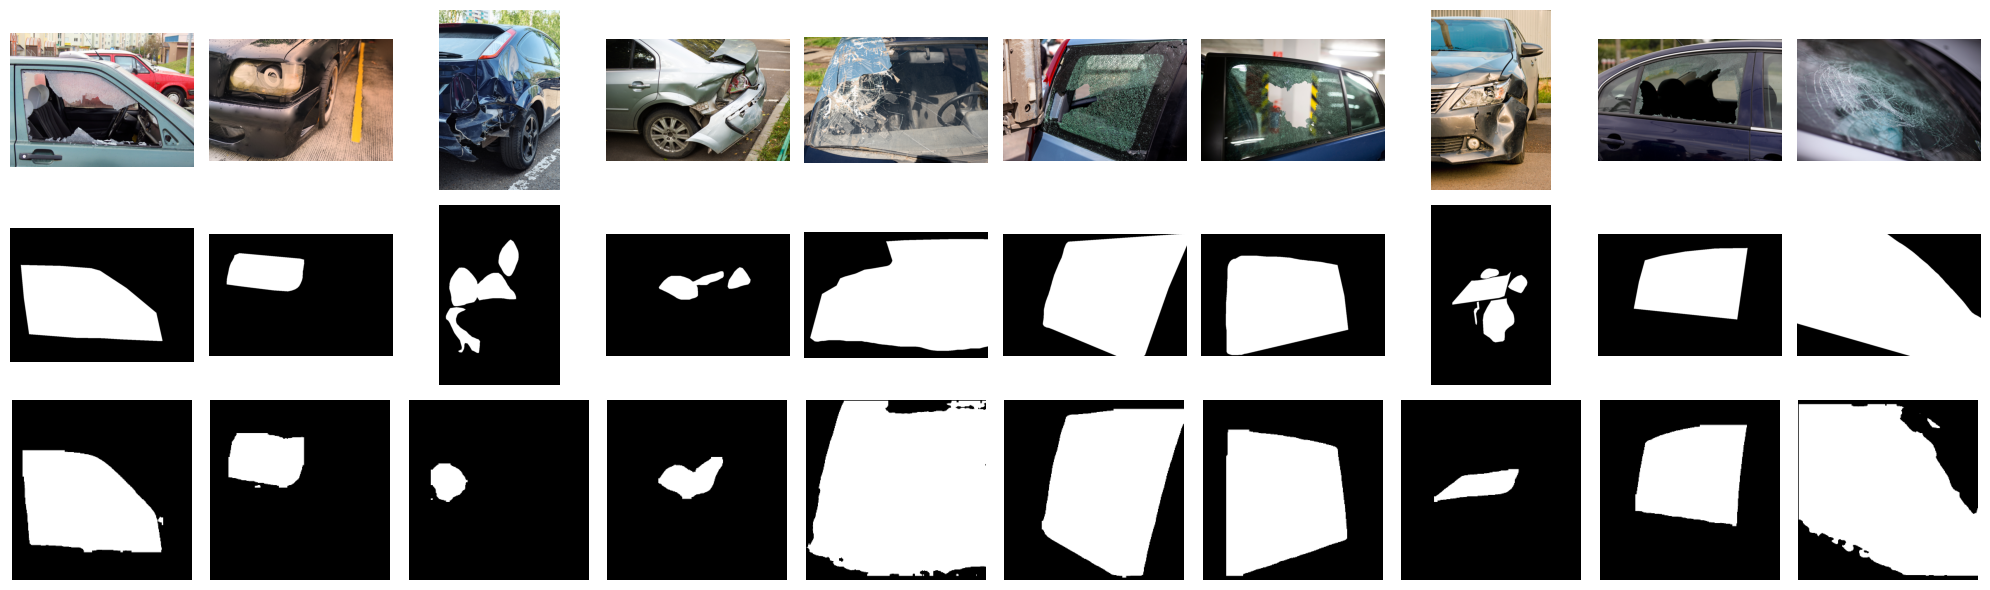

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_dir = 'D:\Projects\Automated Vehicle Damage Detection and Cost Analysis Using Computer Vision\Data\yolov11_format\images\\test'
mask_dir = 'D:\Projects\Automated Vehicle Damage Detection and Cost Analysis Using Computer Vision\Data\yolov11_format\masks\\test'

image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]
image_files = image_files[10:25]

fig, axes = plt.subplots(3, 10, figsize=(20, 6))

for i, image_file in enumerate(image_files):
    image_path = os.path.join(image_dir, image_file)
    mask_path = os.path.join(mask_dir, image_file[:-4] + '.png')

    try:
      img = cv2.imread(image_path)
      mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

      prediction = find_result(image_path, model)

      axes[0, i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      axes[0, i].axis('off')
      axes[1, i].imshow(mask, cmap='gray')
      axes[1, i].axis('off')
      axes[2, i].imshow(prediction, cmap='gray')
      axes[2, i].axis('off')

    except Exception as e:
      print(f"Error processing {image_file}: {e}")

plt.tight_layout()
plt.show()

In [16]:
shutil.copytree('/content/runs', '/content/drive/MyDrive/runs-cardamageseg')

'/content/drive/MyDrive/runs-cardamageseg'